# 4Team EDA

## 1. 라이브러리 & 한글폰트 설정

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

## 2. 데이터 불러오기

In [5]:
df = pd.read_csv('../data/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## 3. 기본 정보 확인
- 총 4000개의 데이터, 컬럼수 14개, 결측치 없음.
- 수치형 변수
- Target : Churn

In [6]:
df.info()
df.describe()
df.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  Churn
1       1              1        1              1      12               1             31   326.367422                    8.0                    4         3.374454                   3.393701                           0        1
                                                                                     32   4.556641                      10.0                   3         1.985369                   1.930489                           0        1
                                                                                          4.920062                      12.0                   0         3.734300                   3.684652                           0        1
                                                                                          49.912475  

## 4. 결측치 & 이상치 확인

In [7]:
# 4. 결측치 & 이상치 확인

# (1) 결측치 확인
print("결측치 개수:")
print(df.isnull().sum())

# (2) 이상치 확인 (IQR 방법 예시)
numeric_cols = df.select_dtypes(include='number').columns

print("\n이상치 개수 (IQR 기준):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    outliers = df[outlier_condition]
    print(f"{col}: {outliers.shape[0]}개")


결측치 개수:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

이상치 개수 (IQR 기준):
gender: 0개
Near_Location: 619개
Partner: 0개
Promo_friends: 0개
Phone: 386개
Contract_period: 0개
Group_visits: 0개
Age: 32개
Avg_additional_charges_total: 29개
Month_to_end_contract: 0개
Lifetime: 192개
Avg_class_frequency_total: 16개
Avg_class_frequency_current_month: 8개
Churn: 0개
중복된 행 수:  0


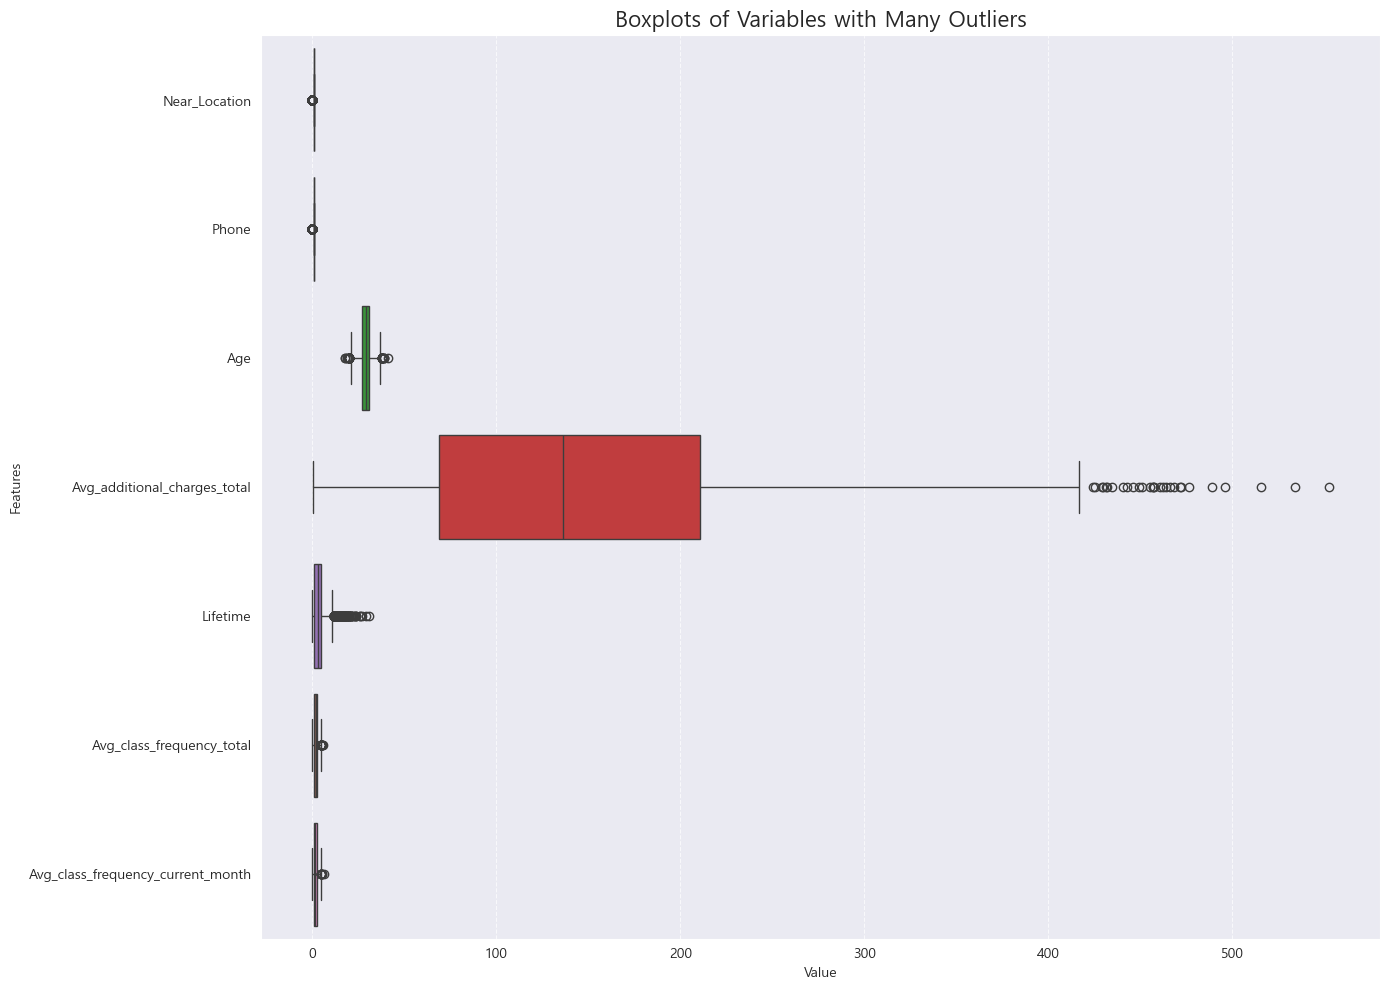

In [8]:
print("결측치 개수:")
print(df.isnull().sum())

## 5. 타겟 분포 시각화


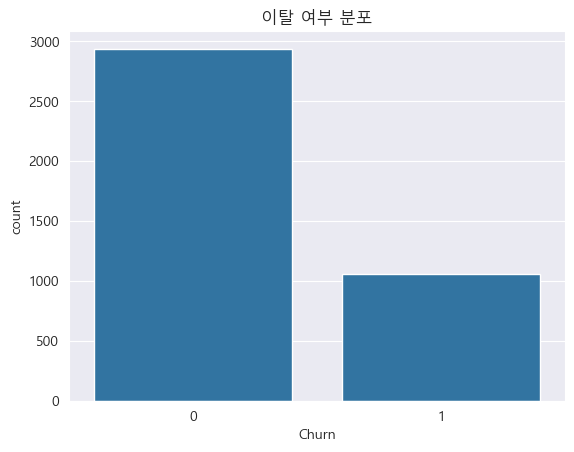

In [9]:
sns.countplot(data=df, x='Churn')
plt.title("이탈 여부 분포")
plt.show()


## 6-1. 전체 상관계수 행렬 시각화

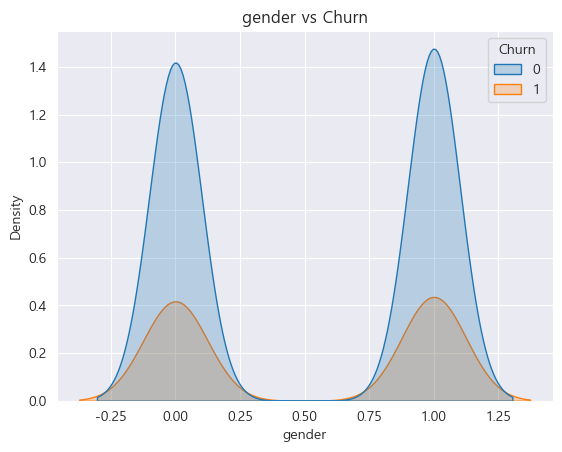

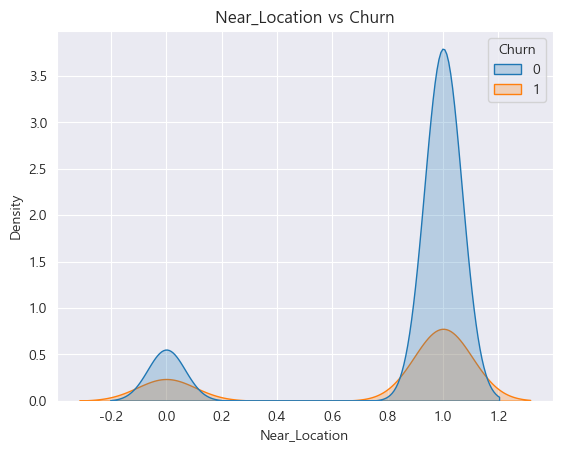

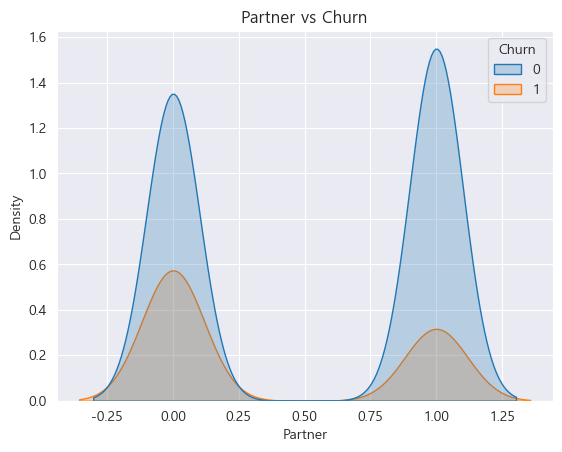

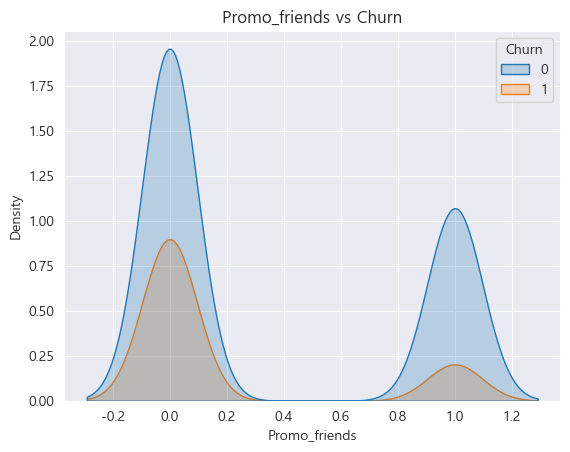

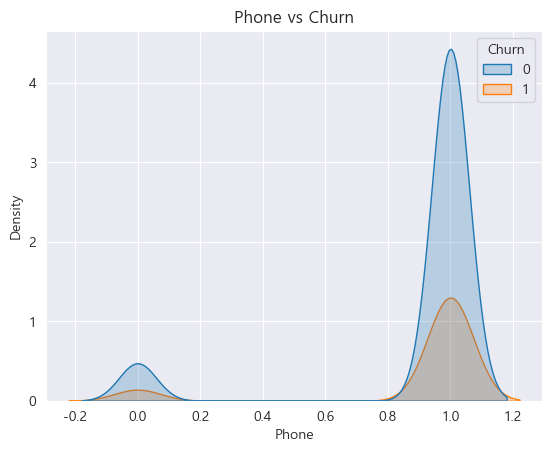

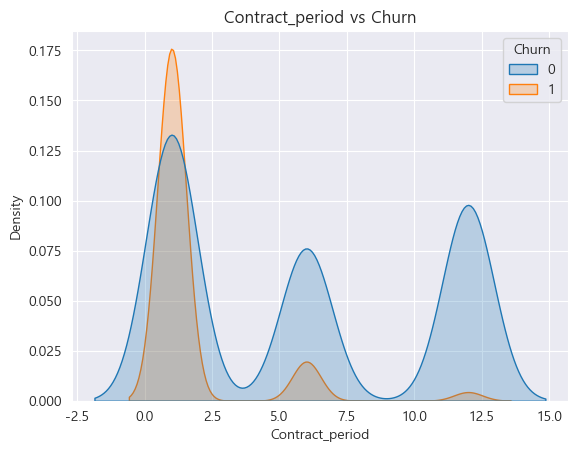

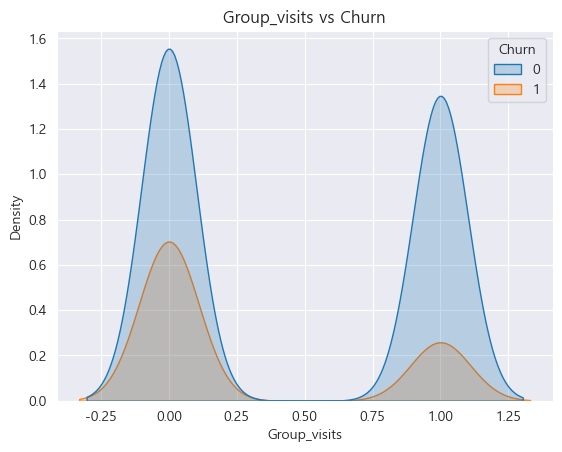

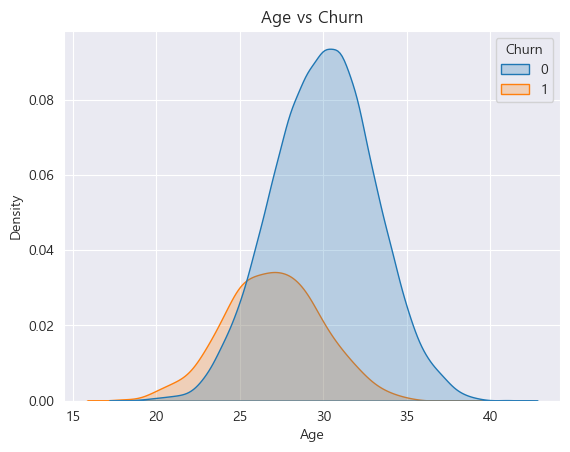

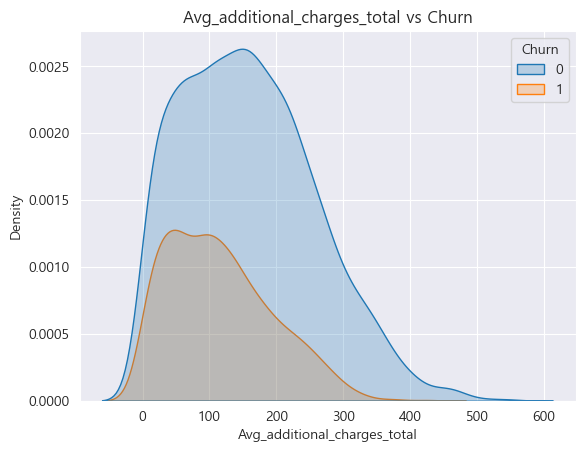

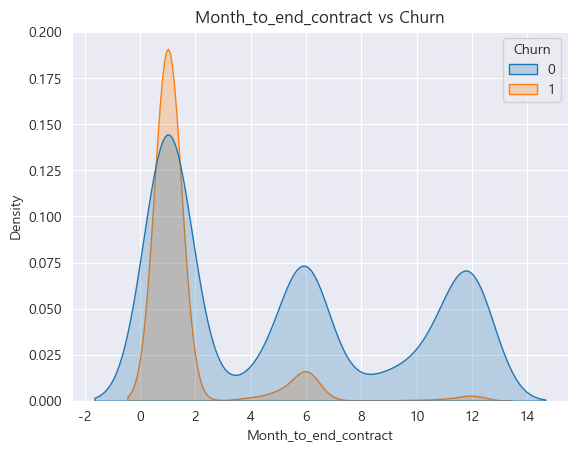

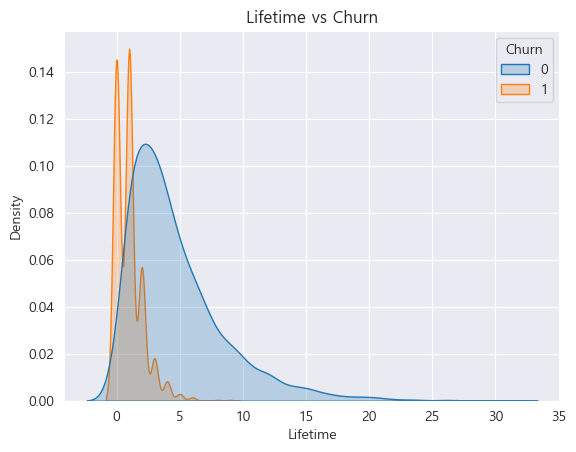

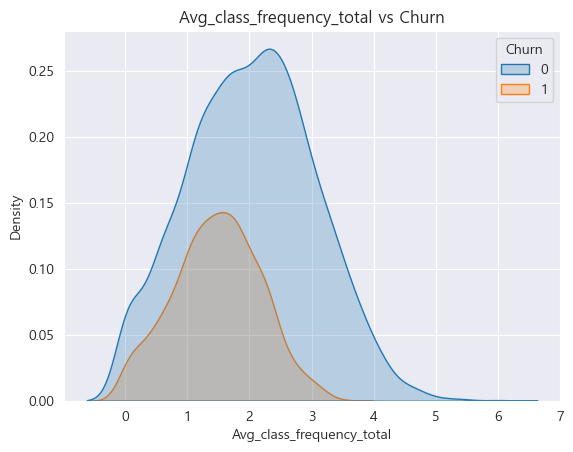

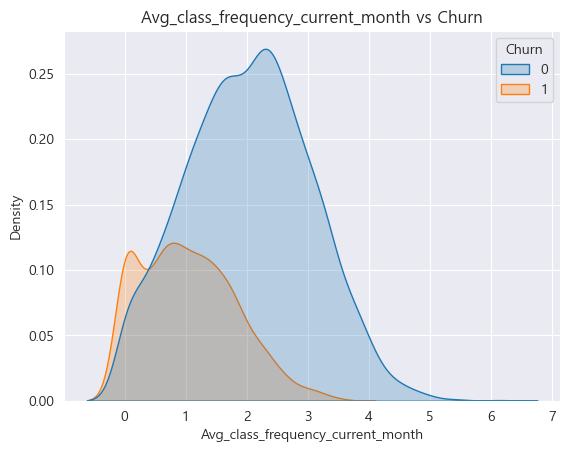

In [31]:
# 전체 수치형 변수 간의 상관계수 시각화
corr_mat = df.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("전체 상관계수 행렬")
plt.show()

## 6-2. 상관계수 0.1 이상 필터링 후 시각화

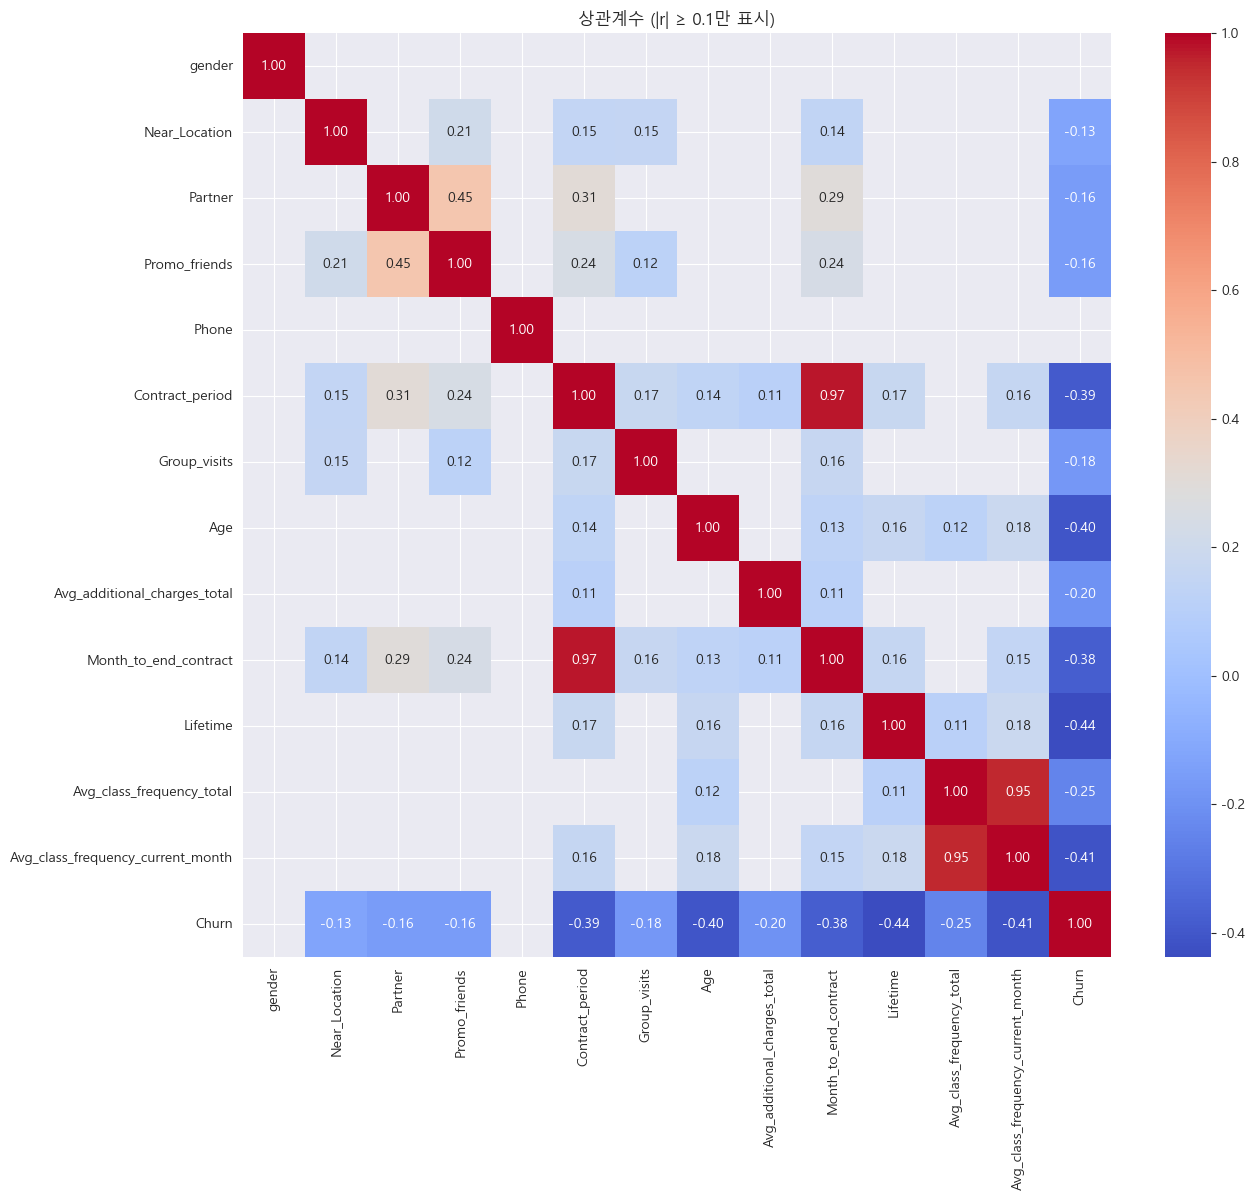

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
corr_mat = df.corr(numeric_only=True)

# 마스킹: 상관계수 절댓값이 0.1 미만이면 True
mask = abs(corr_mat) < 0.1

plt.figure(figsize=(14, 12))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, cbar=True)
plt.title("상관계수 (|r| ≥ 0.1만 표시)")
plt.show()


## 7. EDA 요약 및 모델링을 위한 준비

- 전체 데이터(4000건, 14개 변수)에 대해 결측치가 존재하지 않음

- 수치형 변수 중심으로 일부 변수에서 이상치가 발견됐지만 데이터 오류로 판단되지는 않음

- 타겟 변수 Churn과 상관관계 절댓값이 0.1 이상인 변수를 중심으로 피쳐 선별

- 모델 학습을 위해 주요 범주형 변수(gender, Partner, Near_Location 등)는 숫자형으로 이미 인코딩되어 있으며, 추가 전처리 없이 바로 학습에 활용 가능함